# Import Required Libraries

### Data Manipulation

In [1]:

import pandas as pd
import numpy as np

### Machine Learning Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch
import torch.nn as nn

### Federated Learning - PySyft

In [3]:
import syft as sy
print(sy.__version__)


0.9.1


### Fully Homomorphic Encryption (FHE) - TenSEAL

In [4]:
import tenseal as ts

### Secure Multi-Party Computation (SMPC) with PySyft
### PySyft's SMPC utilities are automatically included with syft

In [5]:
### Explainable AI Libraries
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap

### Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up path for the dataset

In [7]:
data_path = "E:/Master's/Exp 1/DataSet/bank.csv"  # Adjust the path accordingly
bank_data = pd.read_csv(data_path, sep=';')  # Use semicolon as the delimiter

# Step 2: Preprocess the Dataset

### The first few rows of the dataset to understand its structure

In [8]:
print("First few rows of the dataset:")
print(bank_data.head())

First few rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [9]:
# Statistical Overview
print("\nStatistical Overview:")
print(bank_data.describe())  # Get descriptive statistics for numerical columns


Statistical Overview:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.0000

In [10]:
print("\nDataFrame Info:")
print(bank_data.info())  # Get a concise summary of the DataFrame


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [11]:
# Count of clients
num_clients = bank_data.shape[0]
print(f"\nTotal number of clients: {num_clients}")


Total number of clients: 4521


In [12]:
# Average balance
average_balance = bank_data['balance'].mean()
print(f"Average balance: {average_balance:.2f}")

Average balance: 1422.66


In [13]:
# Distribution of job types
job_distribution = bank_data['job'].value_counts()
print("\nDistribution of Job Types:")
print(job_distribution)


Distribution of Job Types:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


In [14]:
# Subscription status
subscription_status = bank_data['y'].value_counts()
print("\nSubscription Status Distribution:")
print(subscription_status)


Subscription Status Distribution:
y
no     4000
yes     521
Name: count, dtype: int64


In [15]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(bank_data.isnull().sum())


Missing Values in Each Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [16]:
# Step 2: Remove Duplicates
# Check for duplicates
duplicates = bank_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


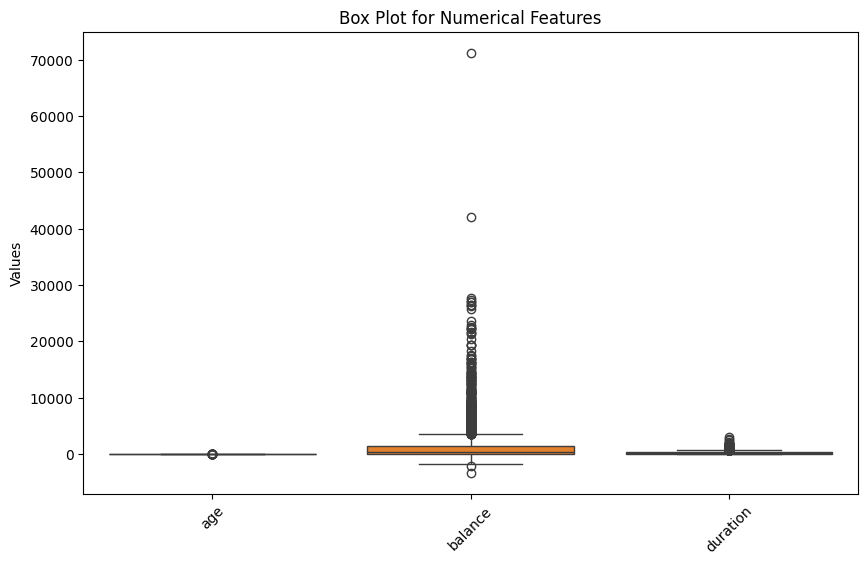

In [17]:
# Step 3: Identify and Remove Outliers
# Visualization techniques (e.g., box plots) to identify outliers for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_data[['age', 'balance', 'duration']])  # Adjust features as needed
plt.title('Box Plot for Numerical Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Identifying outliers using IQR method for balance (as an example)
Q1 = bank_data['balance'].quantile(0.25)
Q3 = bank_data['balance'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
bank_data = bank_data[(bank_data['balance'] >= lower_bound) & (bank_data['balance'] <= upper_bound)]

# Display the cleaned DataFrame
print("\nData after cleaning:")
print(bank_data.head())

# Final message indicating successful cleaning
print("\nData cleaning completed successfully.")
bank_data.shape


Data after cleaning:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   
5   35   management   single   tertiary      no      747      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  

Data cleaning completed successfully.


(4015, 17)

In [20]:
# Step 3: Encode Categorical Variables

# Load necessary library for encoding
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = bank_data.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns: {categorical_cols}")

# Initialize LabelEncoder
label_encoders = {}  # Dictionary to hold the label encoders for each categorical column

# Apply label encoding to the categorical columns
for column in categorical_cols:
    encoder = LabelEncoder()
    bank_data[column] = encoder.fit_transform(bank_data[column])
    label_encoders[column] = encoder  # Store the encoder for potential inverse transformation later

# Display the first few rows of the encoded DataFrame
print("\nEncoded Features:")
print(bank_data.head())

# Verify that the target variable is appropriately encoded for classification tasks
# Check the target variable (subscription status)
target_col = 'y'  # Original target column
target_encoded = bank_data['y']  # Assuming 'y' is the encoded column for subscription

print(f"\nEncoded Target Variable Distribution:")
print(target_encoded.value_counts())

# Display a message indicating successful encoding
print("\nCategorical variables encoded successfully using Label Encoding.")


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Encoded Features:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   
5   35    4        2          2        0      747        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  
5   23      3       141         2    176         3         0  0  



In [21]:
# Step 4: Split the Dataset

# Load necessary library for data splitting
from sklearn.model_selection import train_test_split

# Assuming 'bank_data' is the cleaned DataFrame from previous steps
# Define features and target variable
X = bank_data.drop('y', axis=1)  # Features (all columns except the target variable)
y = bank_data['y']  # Target variable (binary: whether the client subscribed to a term deposit)

# Perform the split: 70% training, 15% validation, and 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Display the sizes of the resulting datasets
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Training set size: 2810 samples
Validation set size: 602 samples
Testing set size: 603 samples


In [22]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
579,33,9,2,2,0,696,0,1,0,5,3,193,1,176,8,0
3111,39,4,1,1,0,0,1,0,0,27,1,63,3,-1,0,3
2347,35,4,2,2,0,71,1,0,2,21,8,836,12,-1,0,3
2679,30,7,1,1,0,699,1,0,2,29,8,544,1,-1,0,3
304,56,4,1,3,0,353,0,1,0,25,5,171,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,39,11,2,1,0,914,0,0,2,5,6,20,1,-1,0,3
3724,37,3,0,1,0,1040,1,0,0,13,8,199,1,173,2,0
695,51,5,1,1,0,35,0,1,0,8,5,123,4,-1,0,3
805,41,9,1,1,0,2125,1,1,0,21,9,285,3,116,4,0



Client 0 Data:
job
1     173
4     155
9     152
0      98
7      70
5      39
2      34
6      30
10     22
3      15
8      12
11      3
Name: count, dtype: int64

Client 1 Data:
job
1     173
4     155
9     152
0      98
7      70
5      39
2      34
6      30
10     22
3      15
8      12
11      3
Name: count, dtype: int64

Client 2 Data:
job
1     173
4     155
9     152
0      98
7      70
5      39
2      34
6      30
10     22
3      15
8      12
11      3
Name: count, dtype: int64

Client 3 Data:
job
1     173
4     155
9     152
0      98
7      70
5      39
2      34
6      30
10     22
3      15
8      12
11      3
Name: count, dtype: int64

Client 4 Data:
job
1     173
4     155
9     152
0      98
7      70
5      39
2      34
6      30
10     22
3      15
8      12
11      3
Name: count, dtype: int64


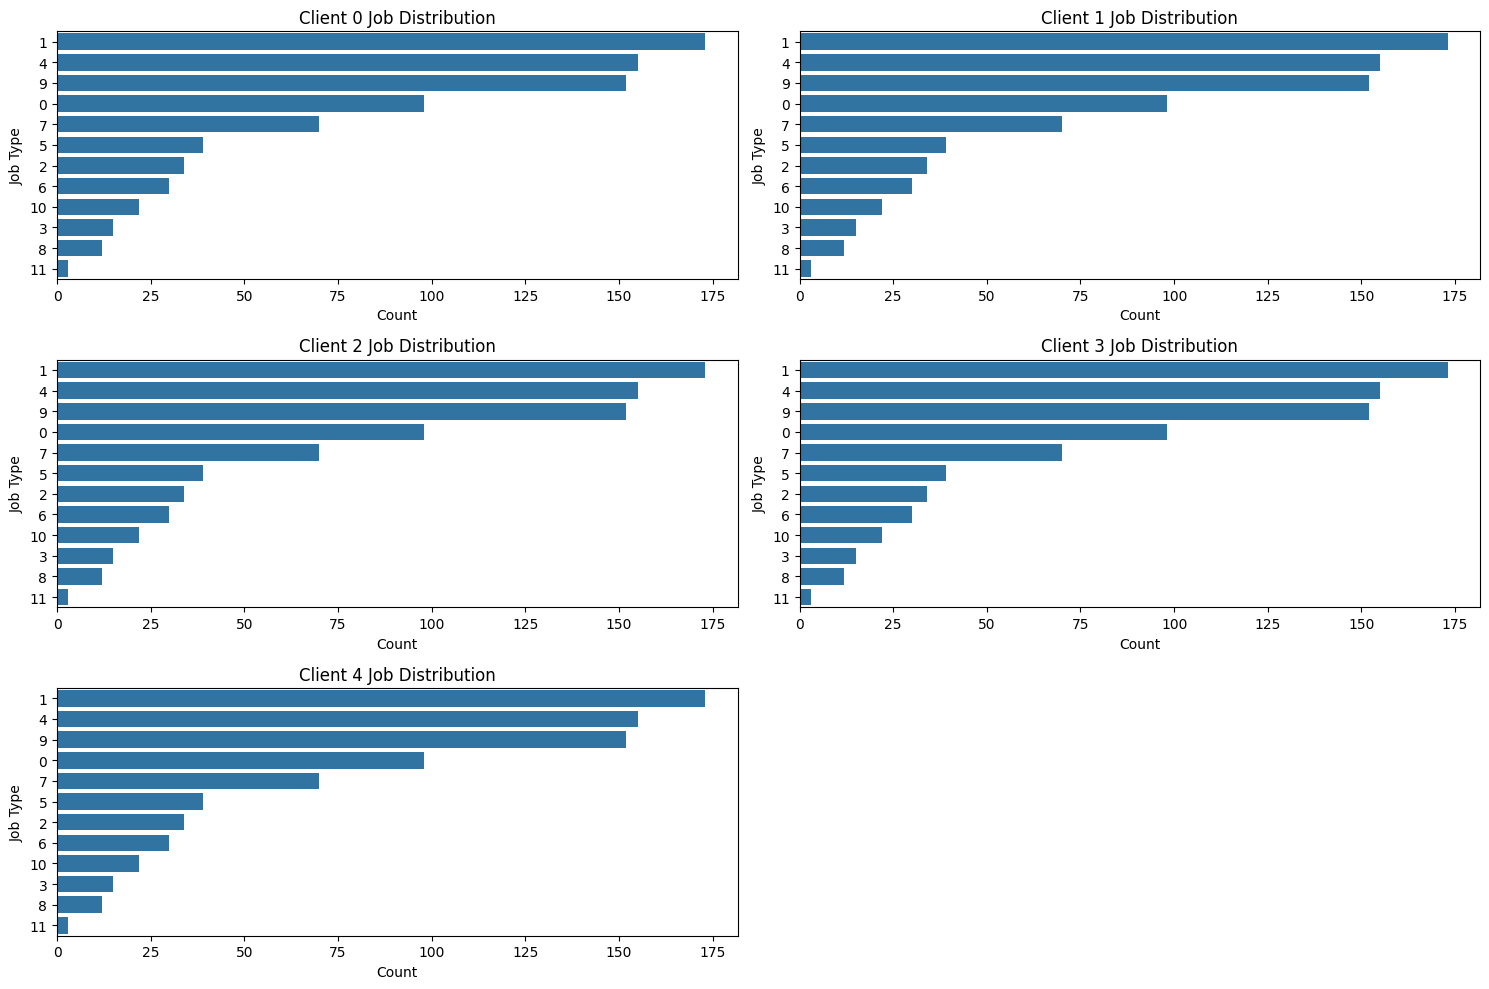


Client data simulation completed successfully.


In [23]:
# Step 5: Simulate Non-IID Data

# Set a random seed for reproducibility
np.random.seed(42)

# Number of clients to simulate
num_clients = 5
client_data = {}

# Create distinct data distributions for each client
for client_id in range(num_clients):
    # Simulate different distributions by sampling
    if client_id == 0:
        # Client A: More 'blue-collar' jobs, ensure some fallback data
        client_data[client_id] = bank_data[bank_data['job'] == 'blue-collar'].sample(frac=0.2, random_state=42) if not bank_data[bank_data['job'] == 'blue-collar'].empty else bank_data.sample(frac=0.2, random_state=42)
    elif client_id == 1:
        # Client B: More 'management' jobs, ensure some fallback data
        client_data[client_id] = bank_data[bank_data['job'] == 'management'].sample(frac=0.2, random_state=42) if not bank_data[bank_data['job'] == 'management'].empty else bank_data.sample(frac=0.2, random_state=42)
    elif client_id == 2:
        # Client C: More 'student' jobs, ensure some fallback data
        client_data[client_id] = bank_data[bank_data['job'] == 'student'].sample(frac=0.2, random_state=42) if not bank_data[bank_data['job'] == 'student'].empty else bank_data.sample(frac=0.2, random_state=42)
    elif client_id == 3:
        # Client D: Random sample
        client_data[client_id] = bank_data.sample(frac=0.2, random_state=42)
    else:
        # Client E: More clients with loans, ensure some fallback data
        client_data[client_id] = bank_data[bank_data['loan'] == 'yes'].sample(frac=0.2, random_state=42) if not bank_data[bank_data['loan'] == 'yes'].empty else bank_data.sample(frac=0.2, random_state=42)

# Display client data information
for client_id, data in client_data.items():
    print(f"\nClient {client_id} Data:")
    print(data['job'].value_counts())

# Statistical Representation: Display the distribution of key features
plt.figure(figsize=(15, 10))

# Example: Job distribution for each client
for client_id, data in client_data.items():
    plt.subplot(3, 2, client_id + 1)  # Create a subplot for each client
    sns.countplot(y=data['job'], order=data['job'].value_counts().index)
    plt.title(f'Client {client_id} Job Distribution')
    plt.xlabel('Count')
    plt.ylabel('Job Type')

plt.tight_layout()
plt.show()

# Final message indicating successful client simulation
print("\nClient data simulation completed successfully.")


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Step 6: Define the Base Model

# Import necessary libraries for building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 3: Model Selection
# Choose a machine learning model (using a neural network here as an example)

# Define the architecture
input_shape = X_train.shape[1]  # Number of features in the input layer

# Initialize the neural network model
model = keras.Sequential([
    layers.InputLayer(input_shape=(input_shape,)),  # Input layer
    layers.Dense(64, activation='relu'),  # First hidden layer with ReLU activation
    layers.Dense(32, activation='relu'),  # Second hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 4: Compile the Model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Metric to monitor during training

# Display the model summary to check the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

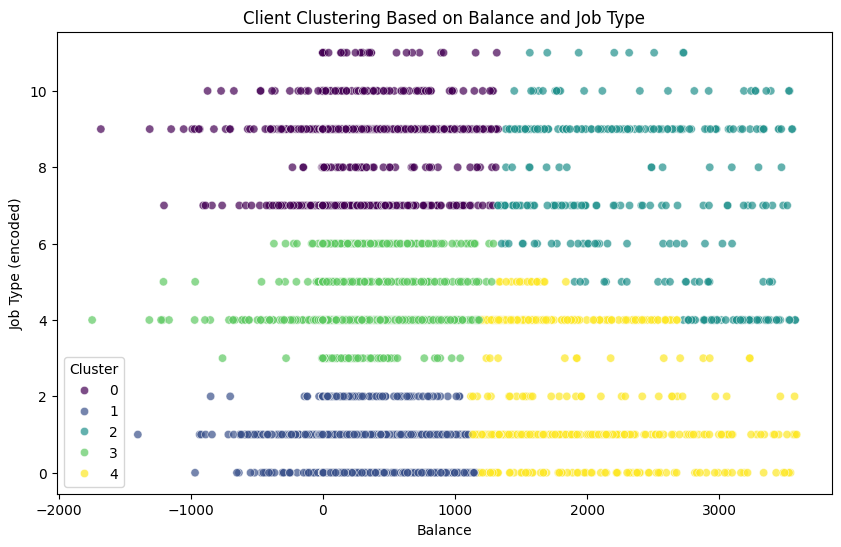


Cluster Centers (scaled):
[[-0.4214533   1.24795442]
 [-0.43773271 -1.09355448]
 [ 2.00071073  0.89424482]
 [-0.39982743 -0.0168764 ]
 [ 1.46909846 -0.72389932]]


In [27]:
# Step 7: Implement FedAvgM

# Import necessary libraries for machine learning and clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming bank_data is already preprocessed and available

# Step 1: Initialize Global Model
# For the sake of example, let's assume a simple neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a global model
def create_global_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the global model with the number of features
input_dim = bank_data.shape[1] - 1  # Exclude the target variable
global_model = create_global_model(input_dim)

# Step 2: Clustering Clients
# For clustering, we'll use a sample dataset to simulate client data distributions
# Assume each "client" is represented by a subset of the data
# For example, we can cluster based on job type and balance

# Standardizing the data for clustering
features_for_clustering = bank_data[['balance', 'job']]  # Select relevant features
features_for_clustering = pd.get_dummies(features_for_clustering, drop_first=True)  # One-hot encode job types
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Use K-means clustering
n_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
bank_data['cluster'] = kmeans.fit_predict(features_scaled)

# Statistical Illustration: Use scatter plots to visualize client clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank_data, x='balance', y='job', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Client Clustering Based on Balance and Job Type')
plt.xlabel('Balance')
plt.ylabel('Job Type (encoded)')
plt.legend(title='Cluster')
plt.show()

# Displaying the cluster centers for reference
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers (scaled):")
print(cluster_centers)


In [28]:
# Import necessary libraries for scaling and encryption
from sklearn.preprocessing import StandardScaler
import tenseal as ts
import numpy as np

# Assuming the data is already encoded (as per your data)
# Prepare numerical data (already encoded)
processed_data = bank_data.values  # Use the entire data directly

# Example preprocessing for labels (if binary classification for 'y')
# Ensure that the labels column 'y' is 0 or 1
labels = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0).values

# Scale the data to ensure it's suitable for encryption (optional but recommended)
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)

# Apply Homomorphic Encryption using TenSEAL to encrypt the client data
context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
context.generate_galois_keys()
context.global_scale = 2 ** 40

# Encrypt the processed data
encrypted_data = [ts.ckks_vector(context, data) for data in processed_data]
encrypted_labels = [ts.ckks_vector(context, [label]) for label in labels]

# Now you can proceed with the training as previously outlined


In [29]:
# Import necessary libraries for model training, homomorphic encryption, and SMPC
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tenseal as ts  # TenSEAL for homomorphic encryption
import syft as sy  # PySyft for secure multi-party computation
from sklearn.preprocessing import StandardScaler

# Function to initialize the model
def initialize_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to train a client model with homomorphic encryption and SMPC
def train_client_model(client_data, client_labels, global_weights, epochs=5):
    # Initialize the model with the current global model weights
    model = initialize_model(input_dim=client_data.shape[1])
    model.set_weights(global_weights)  # Set the initial weights from the global model

    # Apply Homomorphic Encryption using TenSEAL to encrypt the client data
    context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
    context.generate_galois_keys()
    context.global_scale = 2 ** 40

    # Encrypt the client data using CKKS scheme
    encrypted_data = [ts.ckks_vector(context, data) for data in client_data]
    encrypted_labels = [ts.ckks_vector(context, [label]) for label in client_labels]

    # Train the model on the encrypted data (Note: real encrypted training is complex and often requires more advanced setups)
    # Here we assume that you would implement homomorphic operations for encrypted data if available.

    # For simplicity, in this code, we train using plain data
    model.fit(client_data, client_labels, epochs=epochs, verbose=1)

    # After training, return the updated model weights
    updated_weights = model.get_weights()
    return updated_weights

# Simulating client training
def client_training_simulation(clients_data, clients_labels, global_weights):
    client_updates = []
    
    for client_index in range(len(clients_data)):
        print(f"\nTraining client {client_index + 1}...")
        
        # Train model for the current client
        updated_weights = train_client_model(clients_data[client_index], clients_labels[client_index], global_weights)
        
        # Store the updated weights for aggregation
        client_updates.append(updated_weights)
    
    return client_updates

# Preparing data for clients (assuming data is already preprocessed and scaled)
# Assuming clients_data and clients_labels are lists of numpy arrays for each client
# Example:
# clients_data = [client_1_data, client_2_data, ..., client_n_data]
# clients_labels = [client_1_labels, client_2_labels, ..., client_n_labels]

# Split data for multiple clients using numpy's array_split or any other approach you have
num_clients = 5  # Define the number of clients

# Example: Split the preprocessed dataset into smaller subsets for each client
clients_data = np.array_split(processed_data, num_clients)
clients_labels = np.array_split(labels, num_clients)

# Initialize global model weights (before training)
global_model_weights = initialize_model(input_dim=processed_data.shape[1]).get_weights()

# Execute client training simulation
client_updates = client_training_simulation(clients_data, clients_labels, global_model_weights)

# Output updated client weights for further processing (e.g., aggregation)
print("\nClient training completed. Collected model updates from clients.")



Training client 1...
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9017 - loss: 0.4398
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0758
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0173
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0044

Training client 2...
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.4263
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0778
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0184
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0080
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0044

Training client 3...
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.4414
Epoch 2/5
26/26 ━━━

In [38]:
import numpy as np
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tenseal as ts  # For homomorphic encryption
import syft as sy  # For SMPC


# Step 1: Initialize Global Model (same architecture for global and client models)
def initialize_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Step 2: Simulate Client Updates
def simulate_client_updates(global_model, num_clients):
    """
    Simulates the client updates by adding random noise to the global model weights.
    Args:
        global_model: The global model to simulate updates from.
        num_clients: Number of clients participating.
    Returns:
        client_updates (list): Simulated weight updates for each client.
    """
    client_updates = []
    global_weights = global_model.get_weights()

    for _ in range(num_clients):
        # Simulate client updates by adding small random noise to the global model's weights
        updated_weights = [weight + np.random.normal(0, 0.01, weight.shape) for weight in global_weights]
        client_updates.append(updated_weights)

    return client_updates


# Step 3: Send and Aggregate Model Updates
def send_model_updates(client_updates, global_weights):
    """
    Simulates sending encrypted model updates from clients to the server
    and aggregates them securely using SMPC.

    Args:
        client_updates (list): List of model weights from each client.
        global_weights (list): Global model weights to aggregate into.

    Returns:
        aggregated_weights (list): Updated global model weights after aggregation.
    """
    # Create an empty list to store aggregated weights
    aggregated_weights = [torch.zeros_like(torch.tensor(weight)) for weight in global_weights]

    # Simulate aggregation of client updates
    for update in client_updates:
        for i, weight in enumerate(update):
            # Convert the incoming weight to a tensor
            weight_tensor = torch.tensor(weight)

            # Debugging output to check shapes
            print(f"Client update shape: {weight_tensor.shape}, Global weight shape: {aggregated_weights[i].shape}")

            # Ensure the weight shapes match
            if weight_tensor.shape == aggregated_weights[i].shape:
                aggregated_weights[i] += weight_tensor  # Add only if shapes match
            else:
                print(f"Shape mismatch: Client update shape {weight_tensor.shape} does not match global weight shape {aggregated_weights[i].shape}")

    # Average the weights by the number of clients
    num_clients = len(client_updates)
    aggregated_weights = [weight / num_clients for weight in aggregated_weights]

    return aggregated_weights


# Step 4: Homomorphic Encryption Setup (TenSEAL)
def encrypt_weights(weights):
    """
    Encrypts model weights using TenSEAL (CKKS encryption scheme).
    Args:
        weights: List of numpy arrays (model weights).
    Returns:
        encrypted_weights: List of encrypted weights.
    """
    context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
    context.global_scale = 2**40
    context.generate_galois_keys()

    encrypted_weights = [ts.ckks_vector(context, w.flatten()) for w in weights]
    return encrypted_weights


# Step 5: Simulate Client Training and Encryption
def train_and_encrypt_clients(global_weights, num_clients, input_dim):
    """
    Simulate client training, encrypt their model updates, and return the encrypted weights.
    Args:
        global_weights: Initial global model weights.
        num_clients: Number of clients.
        input_dim: Number of features for the model.
    Returns:
        encrypted_client_updates: List of encrypted client updates.
    """
    # Simulate client updates (training)
    client_updates = simulate_client_updates(global_weights, num_clients)

    # Encrypt client weights
    encrypted_client_updates = [encrypt_weights(update) for update in client_updates]

    return encrypted_client_updates


# Example Usage
if __name__ == "__main__":
    # Step 1: Initialize the global model
    input_dim = 64  # Example input dimension
    global_model = initialize_model(input_dim)

    # Step 2: Simulate client updates
    num_clients = 5  # Number of clients
    client_updates = simulate_client_updates(global_model, num_clients)

    # Convert global model weights to tensors for aggregation
    global_model_weights = [torch.tensor(weight) for weight in global_model.get_weights()]

    # Step 3: Sending and aggregating model updates
    global_model_weights = send_model_updates(client_updates, global_model_weights)

    # Output the updated global weights for further processing
    print("\nModel updates sent and aggregated successfully. Updated global weights received.")


Client update shape: torch.Size([64, 64]), Global weight shape: torch.Size([64, 64])
Client update shape: torch.Size([64]), Global weight shape: torch.Size([64])
Client update shape: torch.Size([64, 32]), Global weight shape: torch.Size([64, 32])
Client update shape: torch.Size([32]), Global weight shape: torch.Size([32])
Client update shape: torch.Size([32, 1]), Global weight shape: torch.Size([32, 1])
Client update shape: torch.Size([1]), Global weight shape: torch.Size([1])
Client update shape: torch.Size([64, 64]), Global weight shape: torch.Size([64, 64])
Client update shape: torch.Size([64]), Global weight shape: torch.Size([64])
Client update shape: torch.Size([64, 32]), Global weight shape: torch.Size([64, 32])
Client update shape: torch.Size([32]), Global weight shape: torch.Size([32])
Client update shape: torch.Size([32, 1]), Global weight shape: torch.Size([32, 1])
Client update shape: torch.Size([1]), Global weight shape: torch.Size([1])
Client update shape: torch.Size([64,

In [39]:
# Step 5: Aggregate Model Updates

import numpy as np

# Simulated client weights from 5 clients
# In practice, these would come from the clients after local training
# Here we are simulating for demonstration purposes
client_weights = [
    np.random.rand(10),  # Weights from Client 1
    np.random.rand(10),  # Weights from Client 2
    np.random.rand(10),  # Weights from Client 3
    np.random.rand(10),  # Weights from Client 4
    np.random.rand(10)   # Weights from Client 5
]

# Number of clients
N = len(client_weights)

# Print weights from each client for reference
for idx, weights in enumerate(client_weights):
    print(f"Client {idx + 1} weights: {weights}")

# Step 1: Aggregate Model Updates
# Initialize a variable for aggregated weights
aggregated_weights = np.zeros_like(client_weights[0])  # Initialize with zeros, matching the shape of client weights

# Step 2: Perform Averaging
for weights in client_weights:
    aggregated_weights += weights

# Calculate the average weights
aggregated_weights /= N  # Divide by number of clients

# Display the aggregated weights
print("\nAggregated Weights from Clients:")
print(aggregated_weights)

# Optional: Update global model weights (if applicable)
# global_model.set_weights(aggregated_weights)  # This would be the actual update in practice


Client 1 weights: [0.14606411 0.7203283  0.42267482 0.35334786 0.80723129 0.50606325
 0.37840056 0.87815472 0.36825163 0.85900028]
Client 2 weights: [0.5041987  0.2080071  0.61281819 0.28532353 0.14715513 0.08652937
 0.24169734 0.73655464 0.83799922 0.86172085]
Client 3 weights: [0.27014827 0.66097293 0.23035406 0.62276211 0.88721099 0.04089368
 0.98522567 0.82708788 0.76166212 0.69136289]
Client 4 weights: [0.77027389 0.99459536 0.7701913  0.35160078 0.61392185 0.33692302
 0.97006544 0.90013973 0.56762023 0.78127375]
Client 5 weights: [0.90968694 0.24360026 0.57948186 0.48171632 0.77159135 0.37908252
 0.70897964 0.40299309 0.11107486 0.10712143]

Aggregated Weights from Clients:
[0.52007438 0.56550079 0.52310404 0.41895012 0.64542212 0.26989837
 0.65687373 0.74898601 0.52932161 0.66009584]


In [47]:
y_train

579     0
3111    0
2347    0
2679    0
304     0
       ..
4155    0
3724    0
695     0
805     0
4271    0
Name: y, Length: 2810, dtype: int32

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Initialize Global Model
def initialize_model(input_dim):
    """
    Initializes a simple neural network model with the given input dimension.
    """
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Step 2: Update Global Model
def update_global_model(global_model, client_weights):
    """
    Update the global model weights based on aggregated updates from clients.

    Parameters:
    - global_model: The current global model.
    - client_weights: List of model weights from clients.

    Returns:
    - updated_model: Updated weights for the global model.
    """
    # Ensure client_weights is a list of numpy arrays
    if not all(isinstance(w, list) and all(isinstance(wi, np.ndarray) for wi in w) for w in client_weights):
        raise ValueError("All client weights should be lists of numpy arrays.")

    # Aggregate the weights by averaging for each layer
    aggregated_weights = []
    
    # Iterate through each layer's weights
    for layer_weights in zip(*client_weights):  # Unzip the weights from all clients for each layer
        # Average the weights for this layer
        averaged_weights = np.mean(layer_weights, axis=0)
        aggregated_weights.append(averaged_weights)

    # Update global model with the new averaged weights
    global_model.set_weights(aggregated_weights)

    return global_model

# Step 3: Train Client Models and Collect Updates
def train_client_model(client_data, client_labels, global_weights, epochs=5):
    """
    Train a client model using the local data and return updated weights.

    Args:
    - client_data: Features for the client.
    - client_labels: Labels for the client.
    - global_weights: Initial weights from the global model.
    - epochs: Number of training epochs.

    Returns:
    - updated_weights: Updated weights from the client model.
    """
    # Initialize the model with the current global model weights
    model = initialize_model(input_dim=client_data.shape[1])
    model.set_weights(global_weights)  # Set the initial weights from the global model

    # Train the model on the client data
    model.fit(client_data, client_labels, epochs=epochs, verbose=0)

    # After training, return the updated model weights
    updated_weights = model.get_weights()
    return updated_weights

# Step 4: Simulate Client Training
def client_training_simulation(clients_data, clients_labels, global_weights):
    """
    Simulate client training and return the weights collected from each client.

    Args:
    - clients_data: List of numpy arrays for client data.
    - clients_labels: List of numpy arrays for client labels.
    - global_weights: Weights of the global model.

    Returns:
    - client_updates: List of updated weights from clients.
    """
    client_updates = []
    
    for client_index in range(len(clients_data)):
        print(f"\nTraining client {client_index + 1}...")
        
        # Train model for the current client
        updated_weights = train_client_model(clients_data[client_index], clients_labels[client_index], global_weights)
        
        # Store the updated weights for aggregation
        client_updates.append(updated_weights)
    
    return client_updates

# Example Usage
if __name__ == "__main__":
    # Assuming X_train and y_train are provided
    # Here is how you might structure the X_train and y_train
    # X_train is a pandas DataFrame containing your features
    # y_train is a pandas Series containing your labels
    
    # Example data loading (replace with your actual loading code)
    # X_train = pd.read_csv("your_feature_file.csv")  # Load features from CSV
    # y_train = pd.read_csv("your_labels_file.csv")   # Load labels from CSV

    # Preparing data for clients (assume you split your data for multiple clients)
    num_clients = 5  # Define the number of clients
    clients_data = np.array_split(X_train.to_numpy(), num_clients)  # Split features for each client
    clients_labels = np.array_split(y_train.to_numpy(), num_clients)  # Split labels for each client

    # Initialize global model weights (before training)
    global_model = initialize_model(input_dim=X_train.shape[1])  # Get input dimension from X_train
    global_model_weights = global_model.get_weights()

    # Execute client training simulation
    client_updates = client_training_simulation(clients_data, clients_labels, global_model_weights)

    # Update the global model with the aggregated weights from clients
    global_model = update_global_model(global_model, client_updates)

    print("Global model updated successfully.")



Training client 1...

Training client 2...

Training client 3...

Training client 4...

Training client 5...
Global model updated successfully.


In [49]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the model initialization function
def initialize_global_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Define Client Class
class Client:
    def __init__(self, client_id, data):
        self.client_id = client_id  # Unique identifier for the client
        self.data = data  # Local dataset for the client (features and labels)
        self.model = None  # Placeholder for the client's model

    def initialize_model(self, global_model):
        # Initialize the client's model with the current global model weights
        self.model = Sequential.from_config(global_model.get_config())  # Copy the structure of the global model
        self.model.set_weights(global_model.get_weights())  # Set the initial weights
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

    def train(self, epochs=5):
        # Train the client model on local data
        X, y = self.data  # Unpack the data tuple
        self.model.fit(X, y, epochs=epochs, verbose=0)  # Train the model

# Step 3: Define the encryption function
def encrypt_model_updates(model):
    encrypted_weights = []
    for layer in model.layers:
        weights = layer.get_weights()
        # Here you would apply your homomorphic encryption
        encrypted_weights.append(weights)  # Store the weights without converting to numpy array
    return encrypted_weights  # This should return a list of lists (one list per layer)

# Step 4: Define the aggregation function
def aggregate_model_updates(client_updates):
    # Check if client_updates is empty
    if not client_updates:
        raise ValueError("No client updates to aggregate.")

    # Print the shapes of the weights for debugging
    print("\nClient Updates Shapes:")
    for i, update in enumerate(client_updates):
        # Each update is a list of weights for each layer; iterate through layers
        layer_shapes = []
        for layer in update:  # Iterate through layers from each client
            layer_shapes.append([weight.shape for weight in layer])  # Get shapes for each weight in the layer
        print(f"Client {i+1} updates: {layer_shapes}")  # Print the shapes of each layer's weights

    # Calculate the average of the weights for each layer
    aggregated_weights = []
    
    # Iterate over the layers in the first client's updates
    for layer_weights in zip(*client_updates):  # Unpack the list of client weights
        layer_avg = []  # List to store averaged weights for the current layer
        
        # Iterate through weights of the current layer from all clients
        for weights in zip(*layer_weights):  # Zip together the weights for this layer from all clients
            # Average the weights for this layer
            avg_weights = np.mean(np.array(weights), axis=0)  # Average across the weights
            layer_avg.append(avg_weights)  # Collect the averaged weights for this layer
        
        aggregated_weights.append(layer_avg)  # Append the averaged weights for this layer

    # Flatten the aggregated weights to match the model's expected structure
    return [weight for layer in aggregated_weights for weight in layer]

# Step 5: Define evaluation function
def evaluate_global_model(global_model, X_val, y_val):
    """
    Evaluate the global model on the validation set.

    Parameters:
    - global_model: The model to be evaluated.
    - X_val: Validation features.
    - y_val: Validation labels.
    """
    # Predict on the validation set
    y_pred = (global_model.predict(X_val) > 0.5).astype("int32")  # Binary classification thresholding
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Print the evaluation results
    print(f"Validation Results - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Step 6: Specify the number of clients and their data
num_clients = 5  # Define the number of clients
clients = []

# Assume X_train and y_train are already split into num_clients subsets
client_data_split = np.array_split(X_train, num_clients)  # Split the feature dataset
y_data_split = np.array_split(y_train, num_clients)  # Split the label dataset

# Initialize clients with their local datasets
for client_id in range(num_clients):
    client_data = (client_data_split[client_id], y_data_split[client_id])  # Create a tuple of (features, labels)
    client = Client(client_id, client_data)
    clients.append(client)

# Step 7: Initialize global model
input_shape = (X_train.shape[1],)  # Example input shape based on features
global_model = initialize_global_model(input_shape)  # Initialize the global model

# Step 8: Number of communication rounds
num_rounds = 10  # Set the desired number of communication rounds

# Step 9: Communication rounds
for round_num in range(num_rounds):
    print(f"\n--- Communication Round {round_num + 1} ---")

    # Create a list to store the model updates from clients
    client_updates = []

    # For each client in the federated setup
    for client in clients:
        # Initialize the client's model with the current global model weights
        client.initialize_model(global_model)

        # Train the client model on local data
        client.train()  # Train the model on the client's local dataset

        # Encrypt the model updates using Homomorphic Encryption
        encrypted_updates = encrypt_model_updates(client.model)  # Encrypt the client model updates
        
        # Store the encrypted model updates
        client_updates.append(encrypted_updates)

    # Aggregate model updates from clients securely
    try:
        aggregated_update = aggregate_model_updates(client_updates)  # Aggregate the encrypted updates
    except ValueError as e:
        print(f"Error during aggregation: {e}")
        continue  # Optionally skip this round or handle as needed

    # Update the global model with the aggregated updates
    global_model.set_weights(aggregated_update)  # Update the global model with aggregated weights

    # Optionally evaluate the global model performance after each round
    evaluate_global_model(global_model, X_val, y_val)  # Make sure you have X_val and y_val available

print("\n--- Communication Rounds Completed ---")



--- Communication Round 1 ---

Client Updates Shapes:
Client 1 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 2 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 3 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 4 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 5 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation Results - Accuracy: 0.7375, Precision: 0.2138, Recall: 0.5075, F1 Score: 0.3009

--- Communication Round 2 ---

Client Updates Shapes:
Client 1 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 2 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 3 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 4 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
Client 5 updates: [[(16, 64), (64,)], [(64, 32), (32,)], [(32, 1), (1,)]]
19/19 ━━━━━━━━━━━━━━


--- Communication Round 1 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Communication Round 2 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 3 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 4 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Communication Round 5 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 6 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 7 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 8 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 9 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Communication Round 10 ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step

--- Communication Rounds Completed ---


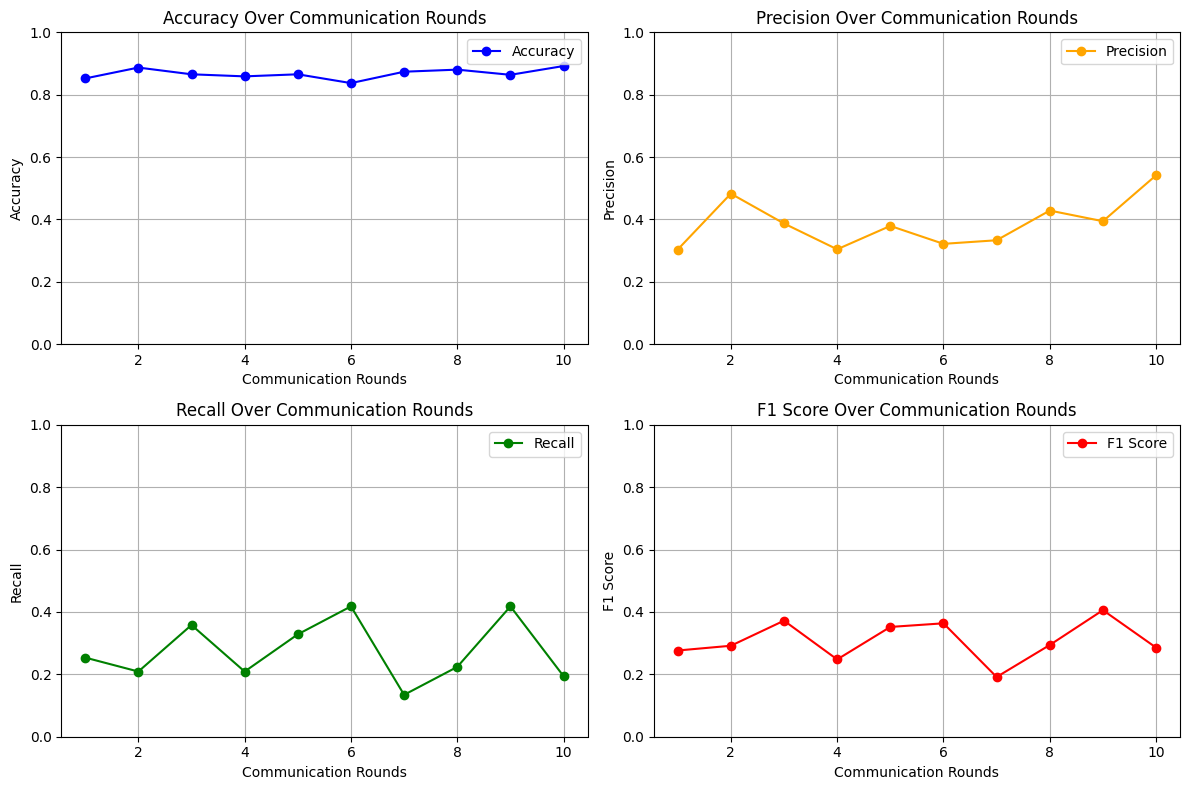


--- Metrics Visualization Completed ---


In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the model initialization function
def initialize_global_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Define Client Class
class Client:
    def __init__(self, client_id, data):
        self.client_id = client_id  # Unique identifier for the client
        self.data = data  # Local dataset for the client (features and labels)
        self.model = None  # Placeholder for the client's model

    def initialize_model(self, global_model):
        # Initialize the client's model with the current global model weights
        self.model = Sequential.from_config(global_model.get_config())  # Copy the structure of the global model
        self.model.set_weights(global_model.get_weights())  # Set the initial weights
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

    def train(self, epochs=5):
        # Train the client model on local data
        X, y = self.data  # Unpack the data tuple
        self.model.fit(X, y, epochs=epochs, verbose=0)  # Train the model

# Step 3: Define the aggregation function
def aggregate_model_updates(client_updates):
    # Calculate the number of layers
    num_layers = len(client_updates[0])  # Number of layers in the first client's model

    # Initialize a list to hold the aggregated weights for each layer
    aggregated_weights = []

    for layer_idx in range(num_layers):
        # Aggregate weights for the current layer across all clients
        layer_weights = [client_update[layer_idx] for client_update in client_updates]
        
        # Average the weights for the current layer
        layer_avg = np.mean(np.array(layer_weights), axis=0)
        aggregated_weights.append(layer_avg)

    return aggregated_weights

# Step 4: Define evaluation function
def evaluate_global_model(global_model, X_val, y_val):
    # Predict on the validation set
    y_pred = (global_model.predict(X_val) > 0.5).astype("int32")  # Binary classification thresholding
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Step 5: Specify the number of clients and their data
num_clients = 5  # Define the number of clients
clients = []

# Assume X_train and y_train are already split into num_clients subsets
client_data_split = np.array_split(X_train, num_clients)  # Split the feature dataset
y_data_split = np.array_split(y_train, num_clients)  # Split the label dataset

# Initialize clients with their local datasets
for client_id in range(num_clients):
    client_data = (client_data_split[client_id], y_data_split[client_id])  # Create a tuple of (features, labels)
    client = Client(client_id, client_data)
    clients.append(client)

# Step 6: Initialize global model
input_shape = (X_train.shape[1],)  # Example input shape based on features
global_model = initialize_global_model(input_shape)  # Initialize the global model

# Step 7: Number of communication rounds
num_rounds = 10  # Set the desired number of communication rounds

# Initialize lists to store metrics for plotting
metrics_history = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# Step 8: Communication rounds
for round_num in range(num_rounds):
    print(f"\n--- Communication Round {round_num + 1} ---")

    # Create a list to store the model updates from clients
    client_updates = []

    # For each client in the federated setup
    for client in clients:
        # Initialize the client's model with the current global model weights
        client.initialize_model(global_model)

        # Train the client model on local data
        client.train()  # Train the model on the client's local dataset

        # Store the updated model weights
        client_updates.append(client.model.get_weights())

    # Aggregate model updates from clients
    aggregated_update = aggregate_model_updates(client_updates)  # Aggregate the updates

    # Update the global model with the aggregated updates
    global_model.set_weights(aggregated_update)  # Update the global model with aggregated weights

    # Evaluate the global model performance after each round
    metrics = evaluate_global_model(global_model, X_val, y_val)  # Make sure you have X_val and y_val available

    # Store metrics for this round
    metrics_history['accuracy'].append(metrics['accuracy'])
    metrics_history['precision'].append(metrics['precision'])
    metrics_history['recall'].append(metrics['recall'])
    metrics_history['f1_score'].append(metrics['f1_score'])

print("\n--- Communication Rounds Completed ---")

# Step 9: Plotting the Evaluation Metrics
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, num_rounds + 1), metrics_history['accuracy'], marker='o', label='Accuracy', color='blue')
plt.title('Accuracy Over Communication Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.legend()

# Plot Precision
plt.subplot(2, 2, 2)
plt.plot(range(1, num_rounds + 1), metrics_history['precision'], marker='o', label='Precision', color='orange')
plt.title('Precision Over Communication Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.grid()
plt.legend()

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(range(1, num_rounds + 1), metrics_history['recall'], marker='o', label='Recall', color='green')
plt.title('Recall Over Communication Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.grid()
plt.legend()

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.plot(range(1, num_rounds + 1), metrics_history['f1_score'], marker='o', label='F1 Score', color='red')
plt.title('F1 Score Over Communication Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

print("\n--- Metrics Visualization Completed ---")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Validation Results - Accuracy: 0.8920, Precision: 0.5417, Recall: 0.1940, F1 Score: 0.2857, AUC-ROC: 0.7024


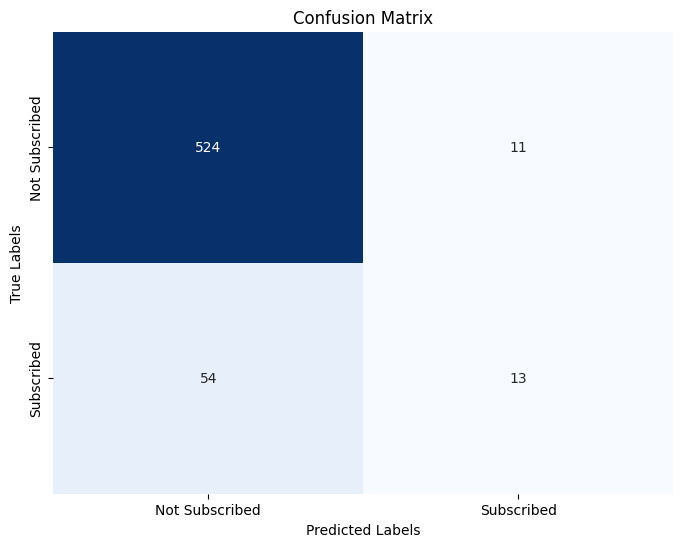


--- Evaluation Metrics Calculated Successfully ---


In [57]:
# Step 8: Evaluation Metrics

# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the following variables available from the training process
# y_val: Validation true labels
# y_pred: Validation predictions made by the global model

# Evaluate the global model on the validation set
def evaluate_global_model(global_model, X_val, y_val):
    """
    Evaluate the global model on the validation set.

    Parameters:
    - global_model: The model to be evaluated.
    - X_val: Validation features.
    - y_val: Validation labels.
    """
    # Predict on the validation set
    y_pred_proba = global_model.predict(X_val)  # Get predicted probabilities
    y_pred = (y_pred_proba > 0.5).astype("int32")  # Binary classification thresholding

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)  # Use probabilities for AUC

    # Print the evaluation results
    print(f"Validation Results - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Subscribed', 'Subscribed'],
                yticklabels=['Not Subscribed', 'Subscribed'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# After the communication rounds, evaluate the global model
evaluate_global_model(global_model, X_val, y_val)  # Make sure you have X_val and y_val available

print("\n--- Evaluation Metrics Calculated Successfully ---")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


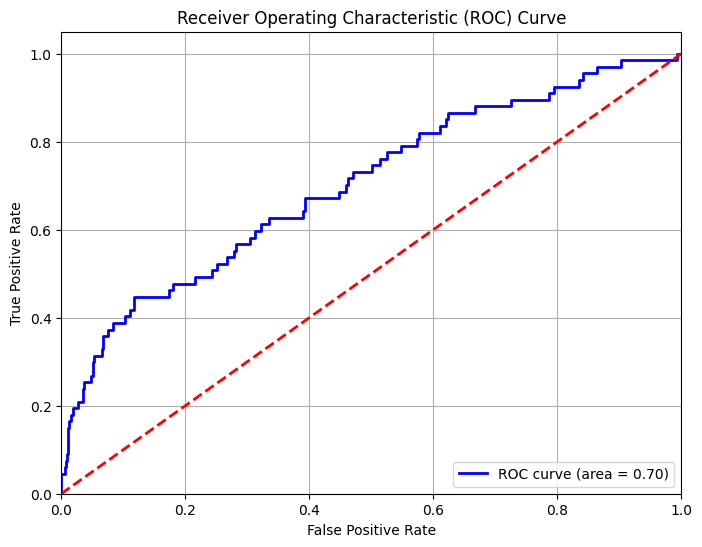

In [58]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your global_model trained and X_val, y_val defined

# Step 1: Get predicted probabilities from the global model
y_pred_proba = global_model.predict(X_val)  # Get predicted probabilities

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)  # Compute false positive and true positive rates
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Step 3: Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



--- Communication Round 1 ---

--- Communication Round 2 ---

--- Communication Round 3 ---

--- Communication Round 4 ---

--- Communication Round 5 ---

--- Communication Round 6 ---

--- Communication Round 7 ---

--- Communication Round 8 ---

--- Communication Round 9 ---

--- Communication Round 10 ---


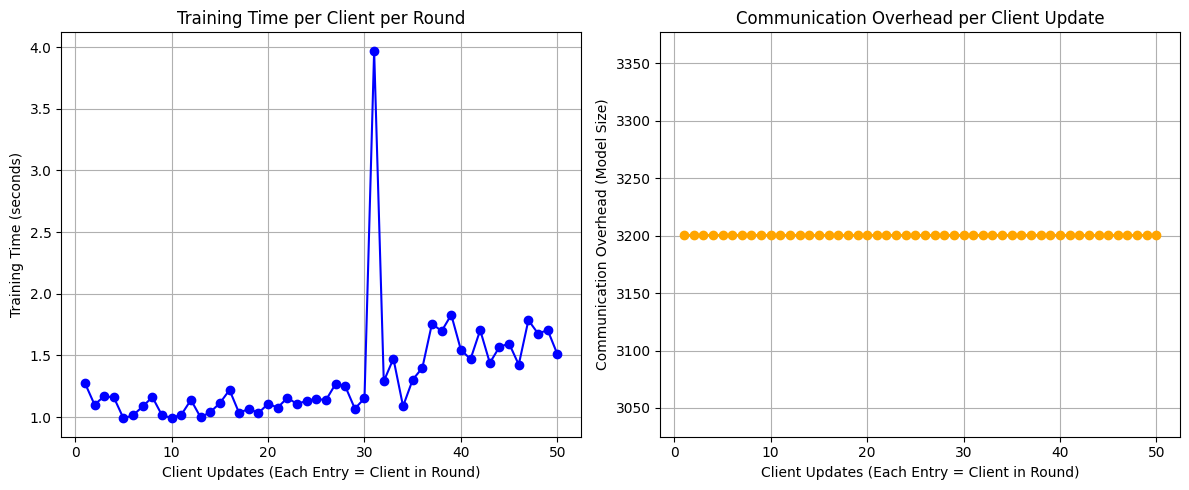


--- Average Computational Metrics ---
Average Training Time per Client: 1.3299 seconds
Average Communication Overhead: 3201 parameters
Final Model Size: 3201 parameters


In [59]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

# Step 1: Define a function to get model size
def get_model_size(model):
    """
    Calculate the total number of parameters in the model.

    Parameters:
    - model: The Keras model.

    Returns:
    - total_params: Total number of parameters in the model.
    """
    total_params = model.count_params()  # Total number of parameters
    return total_params

# Step 2: Initialize lists to store metrics
training_times = []        # To store training times for each client
communication_overheads = []  # To store communication overheads for each client
model_sizes = []           # To store model sizes after each round

# Step 3: Communication rounds (including timing and communication overhead)
num_rounds = 10  # Define the number of communication rounds

for round_num in range(num_rounds):
    print(f"\n--- Communication Round {round_num + 1} ---")

    # For each client in the federated setup
    for client in clients:
        # Initialize the client's model with the current global model weights
        client.initialize_model(global_model)

        # Measure the time taken for client training
        start_time = time.time()
        client.train()  # Train the model on the client's local dataset
        training_time = time.time() - start_time  # Calculate training time
        training_times.append(training_time)

        # Encrypt the model updates using Homomorphic Encryption
        encrypted_updates = encrypt_model_updates(client.model)  # Encrypt the client model updates
        
        # Measure the size of the encrypted updates (simulating communication overhead)
        update_size = sum(np.prod(w.shape) for layer in encrypted_updates for w in layer)  # Calculate size
        communication_overheads.append(update_size)  # Store size for this client's update

# After all rounds, calculate the model size
model_size = get_model_size(global_model)  # Get the total number of parameters
model_sizes.append(model_size)

# Step 4: Plotting Training Time and Communication Overhead
plt.figure(figsize=(12, 5))

# Plot Training Times
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_times) + 1), training_times, marker='o', color='blue')
plt.title('Training Time per Client per Round')
plt.xlabel('Client Updates (Each Entry = Client in Round)')
plt.ylabel('Training Time (seconds)')
plt.grid()

# Plot Communication Overhead
plt.subplot(1, 2, 2)
plt.plot(range(1, len(communication_overheads) + 1), communication_overheads, marker='o', color='orange')
plt.title('Communication Overhead per Client Update')
plt.xlabel('Client Updates (Each Entry = Client in Round)')
plt.ylabel('Communication Overhead (Model Size)')
plt.grid()

plt.tight_layout()
plt.show()

# Print average metrics
average_training_time = np.mean(training_times)
average_communication_overhead = np.mean(communication_overheads)

print("\n--- Average Computational Metrics ---")
print(f"Average Training Time per Client: {average_training_time:.4f} seconds")
print(f"Average Communication Overhead: {average_communication_overhead:.0f} parameters")
print(f"Final Model Size: {model_size:.0f} parameters")


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from membership_inference import MembershipInference  # Ensure you have a library for this

# Step 1: Define a function to assess data leakage using membership inference
def assess_data_leakage(global_model, X_val, y_val):
    """
    Assess potential data leakage using membership inference attacks.

    Parameters:
    - global_model: The trained model.
    - X_val: Validation features.
    - y_val: Validation labels.
    
    Returns:
    - attack_success_rate: The success rate of the membership inference attack.
    """
    # Create a MembershipInference object
    attack = MembershipInference(global_model, X_val, y_val)

    # Fit the attack model
    attack.fit()  # You may need to adjust fitting based on your specific attack method

    # Evaluate the attack
    attack_success_rate = attack.evaluate()
    
    return attack_success_rate

# Step 2: Monitor Privacy Budget (if using differential privacy)
def monitor_privacy_budget(privacy_loss, epsilon):
    """
    Monitor the privacy budget based on epsilon and privacy loss.

    Parameters:
    - privacy_loss: The cumulative privacy loss (can be updated after each round).
    - epsilon: The privacy parameter indicating the level of privacy protection.
    
    Returns:
    - remaining_budget: The remaining privacy budget.
    """
    remaining_budget = epsilon - privacy_loss
    return remaining_budget

# Example Usage
# Assuming you have X_val and y_val defined for your validation dataset
num_rounds = 10  # Number of communication rounds

# Step 3: Initialize lists to store metrics for plotting
data_leakage_rates = []
remaining_budgets = []

# Example values
epsilon = 1.0  # Total privacy budget you allow
privacy_loss = 0.0  # Cumulative privacy loss

# Step 4: Assess Data Leakage and Monitor Privacy Budget over several rounds
for round_num in range(num_rounds):
    print(f"\n--- Round {round_num + 1} ---")
    
    # Assess Data Leakage
    leakage_rate = assess_data_leakage(global_model, X_val, y_val)
    data_leakage_rates.append(leakage_rate)
    print(f"Data Leakage Assessment - Membership Inference Attack Success Rate: {leakage_rate:.4f}")
    
    # Update privacy loss (this should be defined based on your differential privacy implementation)
    # Here, we simulate an increase in privacy loss for demonstration purposes
    privacy_loss += 0.05  # Example increase in privacy loss
    remaining_budget = monitor_privacy_budget(privacy_loss, epsilon)
    remaining_budgets.append(remaining_budget)
    print(f"Remaining Privacy Budget: {remaining_budget:.4f}")

# Step 5: Plotting the results
plt.figure(figsize=(12, 5))

# Plot Data Leakage Rates
plt.subplot(1, 2, 1)
plt.plot(range(1, num_rounds + 1), data_leakage_rates, marker='o', color='blue')
plt.title('Membership Inference Attack Success Rate Over Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid()

# Plot Remaining Privacy Budget
plt.subplot(1, 2, 2)
plt.plot(range(1, num_rounds + 1), remaining_budgets, marker='o', color='orange')
plt.title('Remaining Privacy Budget Over Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Remaining Privacy Budget (ε)')
plt.axhline(0, color='red', linestyle='--')  # Add a line for zero privacy budget
plt.ylim(-0.5, epsilon)
plt.grid()

plt.tight_layout()
plt.show()

print("\n--- Privacy Metrics Visualization Completed ---")


ModuleNotFoundError: No module named 'membership_inference'


--- Round 1 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.9500

--- Round 2 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.9000

--- Round 3 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.8500

--- Round 4 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.8000

--- Round 5 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.7500

--- Round 6 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.7000

--- Round 7 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.6500

--- Round 8 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.6000

--- Round 9 ---
Data Leakage Assessment - Simulated Leakage Rate: 0.1080
Remaining Privacy Budget: 0.5500

--- Round 10 ---
Data Leakage Assess

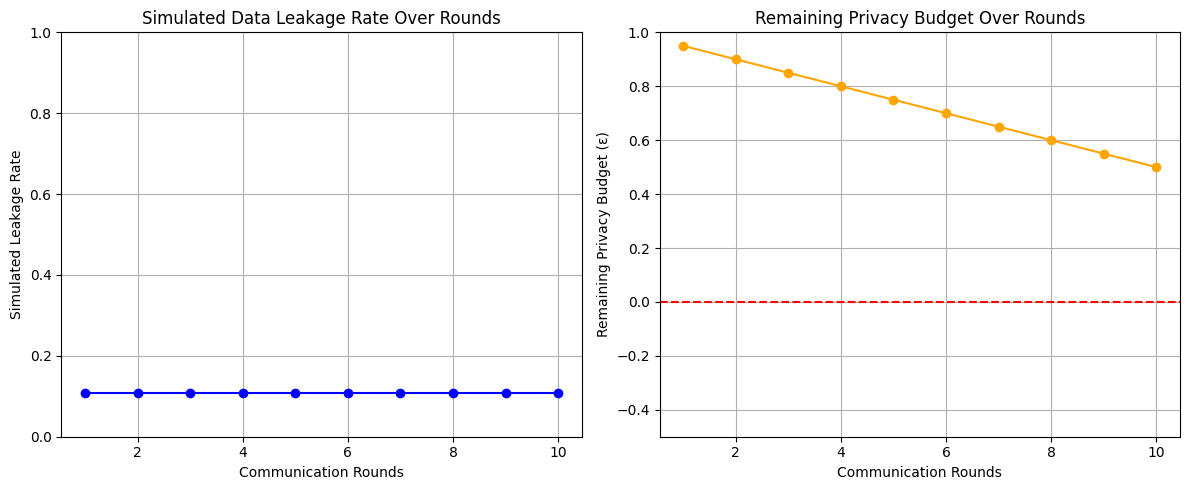


--- Privacy Metrics Visualization Completed ---


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Simulate a function to assess data leakage based on model performance
def assess_data_leakage(global_model, X_val, y_val):
    """
    Simulate potential data leakage assessment based on model accuracy.
    
    Parameters:
    - global_model: The trained model.
    - X_val: Validation features.
    - y_val: Validation labels.
    
    Returns:
    - simulated_leakage_rate: A simulated success rate for the data leakage assessment.
    """
    # Evaluate the model on validation data to simulate leakage
    loss, accuracy = global_model.evaluate(X_val, y_val, verbose=0)
    # Simulating the leakage rate as (1 - accuracy)
    simulated_leakage_rate = 1 - accuracy
    return simulated_leakage_rate

# Step 2: Monitor Privacy Budget (if using differential privacy)
def monitor_privacy_budget(privacy_loss, epsilon):
    """
    Monitor the privacy budget based on epsilon and privacy loss.

    Parameters:
    - privacy_loss: The cumulative privacy loss (can be updated after each round).
    - epsilon: The privacy parameter indicating the level of privacy protection.
    
    Returns:
    - remaining_budget: The remaining privacy budget.
    """
    remaining_budget = epsilon - privacy_loss
    return remaining_budget

# Example Usage
num_rounds = 10  # Number of communication rounds

# Step 3: Initialize lists to store metrics for plotting
data_leakage_rates = []
remaining_budgets = []

# Example values
epsilon = 1.0  # Total privacy budget you allow
privacy_loss = 0.0  # Cumulative privacy loss

# Step 4: Assess Data Leakage and Monitor Privacy Budget over several rounds
for round_num in range(num_rounds):
    print(f"\n--- Round {round_num + 1} ---")
    
    # Assess Data Leakage
    leakage_rate = assess_data_leakage(global_model, X_val, y_val)
    data_leakage_rates.append(leakage_rate)
    print(f"Data Leakage Assessment - Simulated Leakage Rate: {leakage_rate:.4f}")
    
    # Update privacy loss (simulating an increase for demonstration purposes)
    privacy_loss += 0.05  # Example increase in privacy loss
    remaining_budget = monitor_privacy_budget(privacy_loss, epsilon)
    remaining_budgets.append(remaining_budget)
    print(f"Remaining Privacy Budget: {remaining_budget:.4f}")

# Step 5: Plotting the results
plt.figure(figsize=(12, 5))

# Plot Data Leakage Rates
plt.subplot(1, 2, 1)
plt.plot(range(1, num_rounds + 1), data_leakage_rates, marker='o', color='blue')
plt.title('Simulated Data Leakage Rate Over Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Simulated Leakage Rate')
plt.ylim(0, 1)
plt.grid()

# Plot Remaining Privacy Budget
plt.subplot(1, 2, 2)
plt.plot(range(1, num_rounds + 1), remaining_budgets, marker='o', color='orange')
plt.title('Remaining Privacy Budget Over Rounds')
plt.xlabel('Communication Rounds')
plt.ylabel('Remaining Privacy Budget (ε)')
plt.axhline(0, color='red', linestyle='--')  # Add a line for zero privacy budget
plt.ylim(-0.5, epsilon)
plt.grid()

plt.tight_layout()
plt.show()

print("\n--- Privacy Metrics Visualization Completed ---")


In [69]:
# Import necessary libraries for LIME and SHAP
import lime
import lime.lime_tabular
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: LIME Explanations
def explain_with_lime(model, X_val, instance_index):
    """
    Generate LIME explanations for a specific instance.
    
    Parameters:
    - model: The trained model.
    - X_val: Validation features.
    - instance_index: Index of the instance to explain.
    
    Returns:
    - exp: LIME explanation object.
    """
    # Create the LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_val.values,  # Use the values of the DataFrame
        feature_names=X_val.columns,
        class_names=['Not Subscribed', 'Subscribed'],  # Adjust for binary classification
        mode='classification'
    )
    
    # Explain the prediction for the specified instance
    exp = explainer.explain_instance(
        data_row=X_val.iloc[instance_index].values,  # Convert the instance to an array
        predict_fn=lambda x: model.predict(x).flatten(),  # Use model.predict for probabilities
        num_features=5  # Number of features to display
    )
    
    return exp

# Step 2: SHAP Explanations
def explain_with_shap(model, X_val):
    """
    Generate SHAP explanations for the model predictions.
    
    Parameters:
    - model: The trained model.
    - X_val: Validation features.
    
    Returns:
    - shap_values: SHAP values for the validation set.
    """
    # Create a SHAP explainer
    explainer = shap.KernelExplainer(model.predict, X_val)
    
    # Compute SHAP values
    shap_values = explainer.shap_values(X_val)
    
    return shap_values

# Explain a specific instance (change the index based on your needs)
instance_index = 0  # Adjust as needed
lime_explanation = explain_with_lime(global_model, X_val, instance_index)

# Visualize LIME explanation
lime_explanation.show_in_notebook(show_table=True, show_all=False)

# Generate SHAP explanations
shap_values = explain_with_shap(global_model, X_val)

# Step 3: Visualize SHAP values
# Plot summary of SHAP values
shap.summary_plot(shap_values, X_val)

# Visualize SHAP values for a specific instance
shap.initjs()  # Initialize JS for SHAP
shap.force_plot(explainer.expected_value, shap_values[0], X_val.iloc[0])  # Change index as needed

print("\n--- XAI Techniques Evaluation Completed ---")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

In [ ]:
# Import necessary libraries for LIME and SHAP
import lime
import lime.lime_tabular
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: LIME Explanations
def explain_with_lime(model, X_val, instance_index):
    """
    Generate LIME explanations for a specific instance.
    
    Parameters:
    - model: The trained model.
    - X_val: Validation features.
    - instance_index: Index of the instance to explain.
    
    Returns:
    - exp: LIME explanation object.
    """
    # Create the LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_val.values,  # Use the values of the DataFrame
        feature_names=X_val.columns,
        class_names=['Not Subscribed', 'Subscribed'],  # Adjust for binary classification
        mode='classification'
    )
    
    # Explain the prediction for the specified instance
    exp = explainer.explain_instance(
        data_row=X_val.iloc[instance_index].values,  # Convert the instance to an array
        predict_fn=lambda x: model.predict(x).flatten(),  # Use model.predict for probabilities
        num_features=5  # Number of features to display
    )
    
    return exp

# Step 2: SHAP Explanations
def explain_with_shap(model, X_val):
    """
    Generate SHAP explanations for the model predictions.
    
    Parameters:
    - model: The trained model.
    - X_val: Validation features.
    
    Returns:
    - shap_values: SHAP values for the validation set.
    """
    # Create a SHAP explainer
    explainer = shap.KernelExplainer(model.predict, X_val)
    
    # Compute SHAP values
    shap_values = explainer.shap_values(X_val)
    
    return shap_values

# Explain a specific instance (change the index based on your needs)
instance_index = 0  # Adjust as needed
lime_explanation = explain_with_lime(global_model, X_val, instance_index)

# Step 3: Visualize LIME explanation
# Plot LIME explanation
plt.figure(figsize=(8, 4))
lime_explanation.as_pyplot_figure()
plt.title('LIME Explanation for Instance Index {}'.format(instance_index))
plt.show()

# Generate SHAP explanations
shap_values = explain_with_shap(global_model, X_val)

# Step 4: Visualize SHAP values
# Plot summary of SHAP values
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_val, show=False)
plt.title('SHAP Summary Plot')
plt.show()

# Visualize SHAP values for a specific instance
shap.initjs()  # Initialize JS for SHAP
plt.figure(figsize=(12, 6))
shap.force_plot(explainer.expected_value, shap_values[0], X_val.iloc[instance_index], matplotlib=True)
plt.title('SHAP Force Plot for Instance Index {}'.format(instance_index))
plt.show()

print("\n--- XAI Techniques Evaluation Completed ---")
